In [34]:
import numpy as np
from SBPsLib import *
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from brokenaxes import brokenaxes
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [35]:

def enlarge_mask(MaksMap, fac = 2, val = 1):
    Nrow, Ncol = MaksMap.shape
    ind = np.where(MaksMap[:] == val)
    if np.sum(ind) > 0:
        i_row = ind[0]
        i_col = ind[1]
        N = len(i_col)
        imask_row = []; imask_col = []; addmask = [];
        for y in np.arange(-fac,fac+1):
            if (y == -fac) | (y == fac): 
                for x in np.arange(1): addmask.append([x,y])
            elif y != 0:
                dfac = abs(abs(y) % 2 - 1) * (abs(y) / 2 + 1)
                for x in np.arange(-fac+dfac,fac+1-dfac): addmask.append([x,y])
            else:
                for x in np.arange(-fac,fac+1): addmask.append([x,y])
                    
        for i in range(N):
            for j in range(len(addmask)):
                imask_row.append(i_row[i]+addmask[j][0])
                imask_col.append(i_col[i]+addmask[j][1])
                
        imask_row = np.array(imask_row); imask_col = np.array(imask_col);
        ind = np.where( (imask_row > -1) & (imask_row < Nrow ) & (imask_col > -1) & (imask_col < Ncol ) )[0]	
        imask_row = imask_row[ind].astype('int').copy(); 
        imask_col = imask_col[ind].astype('int').copy();
        MaksMap[(imask_row, imask_col)] = val
    return MaksMap

def clipping3sig(data):
    data = data.ravel()
    mu  = np.mean(data)
    sig = np.std(data)
    ind0 = data > mu + 3. * sig
    while np.sum(ind0):
        ind  = np.where( data < mu + 3. * sig )[0]
        data = data[ind].copy()
        mu   = np.mean(data)
        sig  = np.std(data)
        ind0 = data > mu + 3. * sig
    return mu, sig

In [36]:
sns.set(style="white")
sns.set_context("paper")

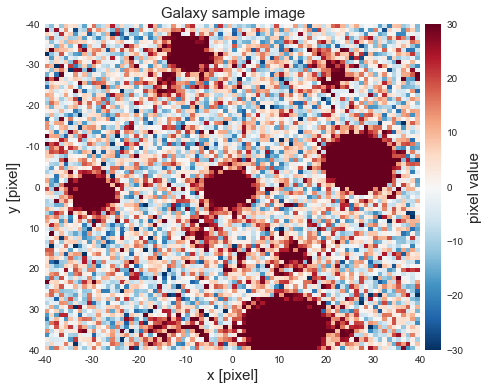

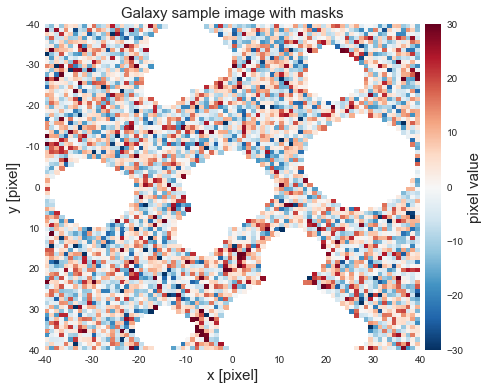

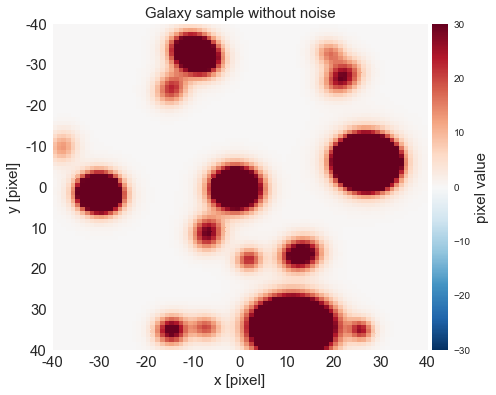

In [37]:
path = '/Users/inchanji/Research/sky_estimation_github/data/'

path_ex  = path + 'F5sample_galsim_sky3240_stack.fits'
path_seg = path + 'F5sample_galsim_sky3240_stack_seg.fits'
path_ex2 = path + 'F5sample_galsim_stack.fits'


vmin = -30.; vmax = 30.; Bndry = 40; 
extent = (-Bndry, Bndry, -Bndry, Bndry); 
fontsize =15;

hdu = fits.open(path_ex)
data1  = hdu[0].data.copy()
fig = plt.figure(0,figsize = (8,6))
ax = plt.axes()
im = sns.heatmap(np.rot90(data1),vmin = vmin, vmax = vmax, 
                 ax = ax, cbar=False, cmap = 'RdBu_r')
cbar = ax.figure.colorbar(im.collections[0], pad=0.01)
cbar.outline.set_visible(False)
cbar.set_ticks(np.arange(vmin,vmax+1,10))
cbar.ax.tick_params(labelsize=fontsize-5) 
cbar.set_label('pixel value', size = fontsize)

ax.set_xticks(np.arange(0,90,10))
ax.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_yticks(np.arange(0,90,10))
ax.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_xlabel('x [pixel]', size = fontsize)
ax.set_ylabel('y [pixel]', size = fontsize)
plt.tick_params(labelsize=fontsize-5) 
plt.title('Galaxy sample image',fontsize=fontsize)
plt.show()


hdu = fits.open(path_seg)
seg  = hdu[0].data.copy()
ind_not = np.logical_not(seg == 0) 
seg[ind_not] = -1
seg = enlarge_mask(seg, 3, -1)

data = data1.copy()
data[seg != 0] = np.nan
fig = plt.figure(0,figsize = (8,6))

ax = plt.axes()
im = sns.heatmap(np.rot90(data),vmin = vmin, cmap = 'RdBu_r',
                 vmax = vmax, ax = ax, cbar=False)
cbar = ax.figure.colorbar(im.collections[0], pad=0.01)
cbar.outline.set_visible(False)
cbar.set_ticks(np.arange(vmin,vmax+1,10))
cbar.ax.tick_params(labelsize=fontsize-5) 
cbar.set_label('pixel value', size = fontsize)

ax.set_xticks(np.arange(0,90,10))
ax.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_yticks(np.arange(0,90,10))
ax.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_xlabel('x [pixel]', size = fontsize)
ax.set_ylabel('y [pixel]', size = fontsize)
plt.tick_params(labelsize=fontsize-5) 
plt.title('Galaxy sample image with masks',fontsize=fontsize)
plt.show()





hdu = fits.open(path_ex2)
fig = plt.figure(0,figsize = (8,6))
ax = plt.axes()
data2  = hdu[0].data.copy()
im = sns.heatmap(np.rot90(data2),vmin = vmin, vmax = vmax, ax = ax, 
                 cmap = 'RdBu_r',  cbar=False)
cbar = ax.figure.colorbar(im.collections[0], pad=0.01)
cbar.outline.set_visible(False)
cbar.set_ticks(np.arange(vmin,vmax+1,10))
cbar.ax.tick_params(labelsize=fontsize-5) 
cbar.set_label('pixel value', size = fontsize)
ax.set_xticks(np.arange(0,90,10))
ax.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_yticks(np.arange(0,90,10))
ax.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_xlabel('x [pixel]', size = fontsize)
ax.set_ylabel('y [pixel]', size = fontsize)
plt.tick_params(labelsize=fontsize) 
plt.title('Galaxy sample without noise',fontsize=fontsize)
plt.show()


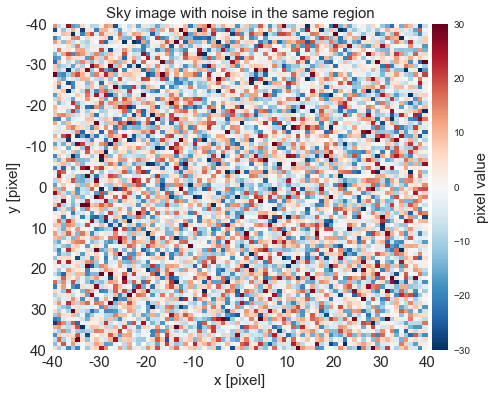

sky noise: 12.588227256398742


In [39]:
path_ex3 = path + 'sky3240_800_x_800_stack.fits'

hdu = fits.open(path_ex3)
fig = plt.figure(0,figsize = (8,6))
ax = plt.axes()
x0 = 450; y0 = 450;
data3  = hdu[0].data[x0:x0+80,x0:x0+80].copy()
sns.heatmap(np.rot90(data3),vmin = vmin, vmax = vmax, 
            ax = ax, cmap = 'RdBu_r',  cbar=False)
cbar = ax.figure.colorbar(im.collections[0], pad=0.01)
cbar.outline.set_visible(False)
cbar.set_ticks(np.arange(vmin,vmax+1,10))
cbar.ax.tick_params(labelsize=fontsize-5) 
cbar.set_label('pixel value', size = fontsize)

ax.set_xticks(np.arange(0,90,10))
ax.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_yticks(np.arange(0,90,10))
ax.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0)
ax.set_xlabel('x [pixel]', size = fontsize)
ax.set_ylabel('y [pixel]', size = fontsize)
plt.tick_params(labelsize=fontsize) 
plt.title('Sky image with noise in the same region',fontsize=fontsize)
plt.show()

print('sky noise:',np.std(data3))



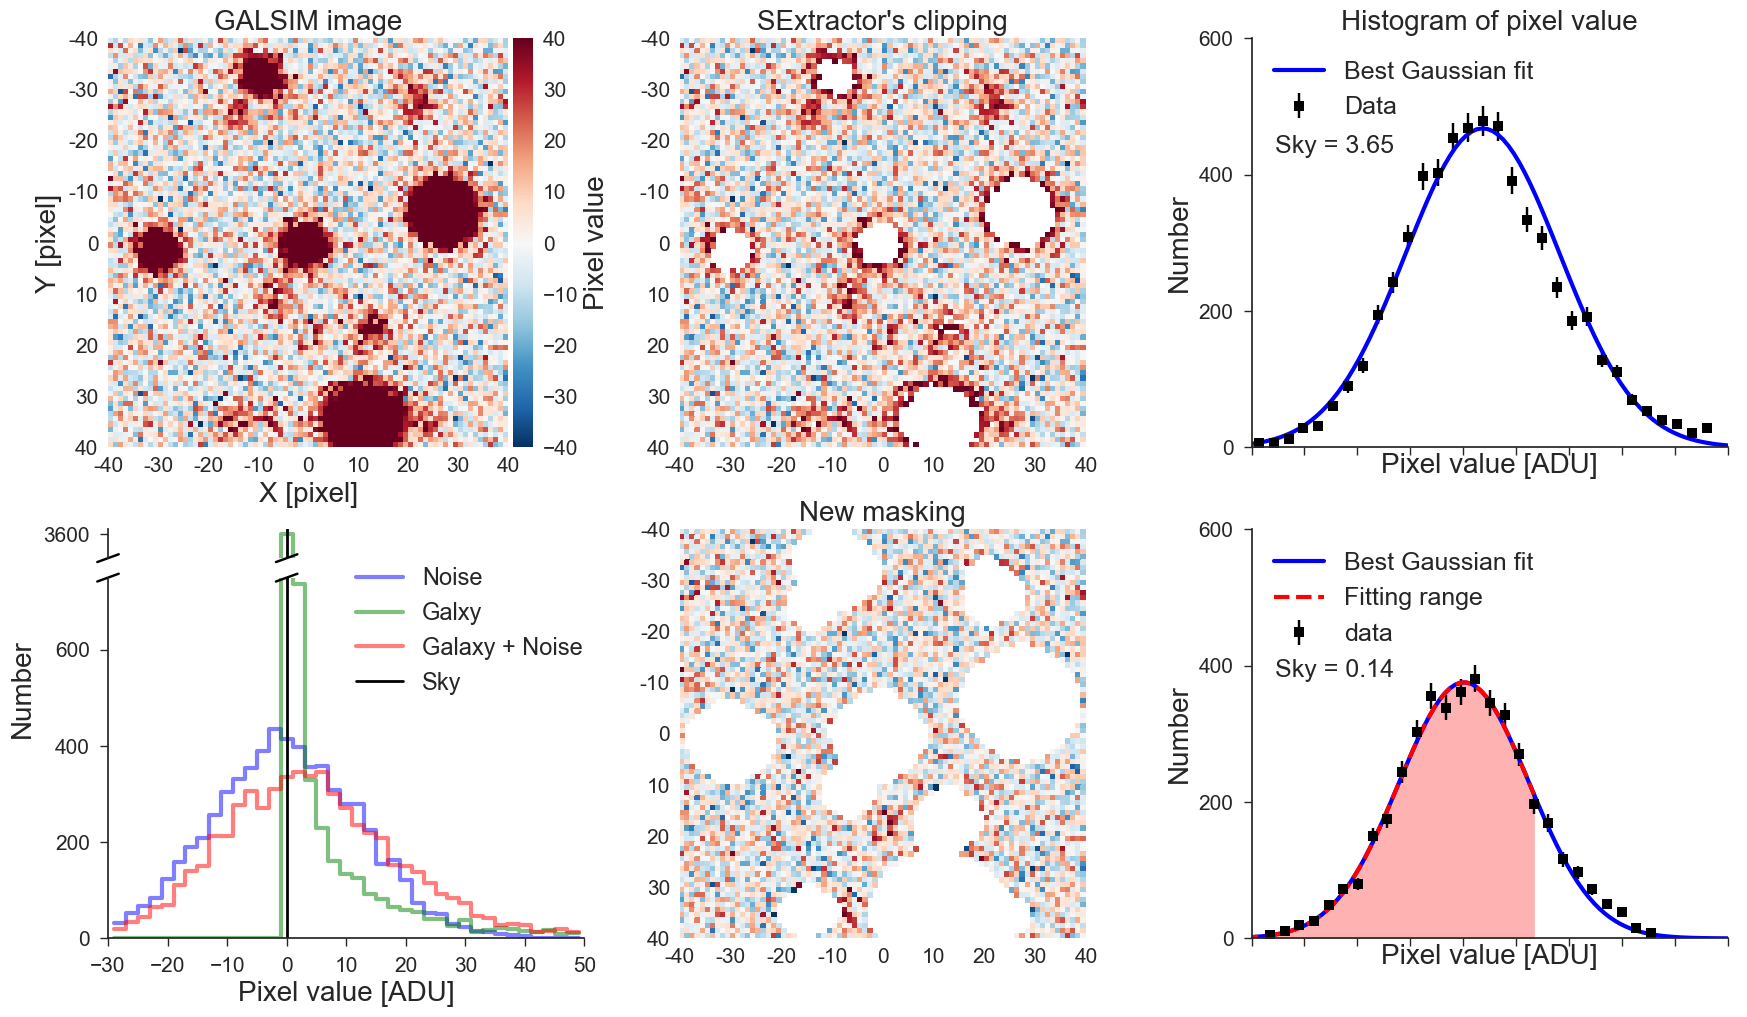

In [40]:

vmin = -30.; vmax = 30.; Bndry = 40; 
extent = (-Bndry, Bndry, -Bndry, Bndry); 
fontsize =15;


vmin = -40; vmax = 40 ; fontsize = 20


sns.set(style="white")
fxsize = 18. ; fysize = 10
fig     = plt.figure(figsize=(fxsize, fysize), dpi=100) 


ax = plt.axes()
ax.set_rasterization_zorder(1) 

gs      = gridspec.GridSpec(2, 3)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)

ax1, ax2, ax3_0 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])
ax4, ax5, ax6_0 = plt.subplot(gs[3]), plt.subplot(gs[4]), plt.subplot(gs[5])
extent = (-Bndry, Bndry, -Bndry, Bndry)


# Row Col = (0, 0)

im = sns.heatmap(np.rot90(data1),vmin = vmin, vmax = vmax, 
                 ax = ax1, cbar=False, cmap = 'RdBu_r')

mappable = im.get_children()[0]
cbar = plt.colorbar(mappable, ax = ax1, pad=0.01)

cbar.outline.set_visible(False)
cbar.set_ticks(np.arange(vmin,vmax+1,10))
cbar.ax.tick_params(labelsize=fontsize-5) 
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label('Pixel value', size = fontsize)
#cbar.ax.yaxis.set_label_coords(0.01, 0.3)

ax1.set_xticks(np.arange(0,90,10))
ax1.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0, size = fontsize-5)
ax1.set_yticks(np.arange(0,90,10))
ax1.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0, size = fontsize-5)
ax1.set_xlabel('X [pixel]', size = fontsize)
ax1.set_ylabel('Y [pixel]', size = fontsize)

ax1.set_title('GALSIM image', fontsize=fontsize)

# Row Col = (0, 1)
data  = data1.copy()

mu, sig = clipping3sig(data.copy())
data[data > mu + 3.*sig] = np.nan

im = sns.heatmap(np.rot90(data),vmin = vmin, vmax = vmax, 
                 ax = ax2, cbar=False, cmap = 'RdBu_r')
ax2.tick_params() 
ax2.set_title('SExtractor\'s clipping', fontsize=fontsize)
ax2.set_xticks(np.arange(0,90,10))
ax2.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0, size = fontsize-5)
ax2.set_yticks(np.arange(0,90,10))
ax2.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0, size = fontsize-5)

div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="5%", pad=0.5)
cax.axis('off')


# Row Col = (0, 2)
sns.set(style="ticks")
ax3_0.axis('off')
inner = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs[2])

ax3 = plt.Subplot(fig, inner[0])
fig.add_subplot(ax3)


data = data[np.isfinite(data)].copy().ravel()
mu, sig = clipping3sig(data.copy())

binsize =  3.5 * np.std(data) *  len(data) **(-0.33333333)  # Bin size by Scott rule
minval = mu - 3. * sig
maxval = mu + 3. * sig

x_hist = []
y_hist = []
xerr_hist = []
yerr_hist = []
val1 = minval 

while val1+binsize < maxval * 2:        
    cnt = np.sum( (data >= val1) & (data < val1+binsize))
    if cnt:
        x_hist.append(val1 + 0.5 * binsize)
        y_hist.append(cnt)
        xerr_hist.append(binsize * 0.5)
        yerr_hist.append(np.sqrt(cnt))
    val1 += binsize

param, xsqr, error =  bestgaussparam_2dim( x = np.array(x_hist), y = np.array(y_hist), param = [np.max(y_hist),mu,sig],\
                        yerr = np.array(yerr_hist), xerr = np.array(xerr_hist))
#mu, sig = param[1], param[2]



xx = np.linspace(-50,50,100)
ax3.plot(xx,gauss2(xx, [param[0],mu,sig]),'b-',linewidth = 3, label = 'Best Gaussian fit')
ax3.errorbar(x_hist, y_hist, yerr= yerr_hist,fmt = 'ks', label = 'Data')
ax3.set_xlabel('Pixel value [ADU]', fontsize=fontsize)
ax3.set_ylabel('Number', fontsize=fontsize)
ax3.set_title('Histogram of pixel value', fontsize=fontsize)
ax3.set_xlim(-40,50)
ax3.set_ylim(0,600)
ax3.tick_params(labelsize=15) 

ax3.legend(loc = 2, frameon=False, fontsize = fontsize-2)
skyval = 'Sky = ' + '%4.2f' % (mu)
ax3.annotate(skyval, xy = (0.05,0.72), xycoords='axes fraction',fontsize=fontsize-2)


sns.despine(fig=None, ax=ax3, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax3.xaxis.tick_top()
ax3.tick_params(labeltop='off')
ax3.xaxis.tick_bottom()
ax3.set_xticks([-40,-30,-20,-10,0,10, 20,30,40,50])
ax3.set_yticks([0,200,400,600])






# Row Col = (1, 0)
ax4.axis('off')
histrange = [-29, 49]
nbins  = int((histrange[1]-histrange[0])/2.)
ylim  = [3550., 3610.]
ylim2 = [0., 750.]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])


inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = gs[3], \
                wspace=0.1, hspace=0.1, height_ratios=[ylimratio, ylim2ratio])

ax4_1 = plt.Subplot(fig, inner[0])
fig.add_subplot(ax4_1)
ax4_2 = plt.Subplot(fig, inner[1])
fig.add_subplot(ax4_2)


ax4_1.tick_params(axis='both', labelsize=15)   
ax4_2.tick_params(axis='both', labelsize=15)   
ax4_1.set_xlim(-30,50);ax4_2.set_xlim(-30,50)

bins, edges = np.histogram(data3, nbins,range = histrange)
left, right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten(); Y = np.array([bins,bins]).T.flatten()
ax4_2.plot(X,Y,'-', color = 'blue', alpha=0.5, linewidth = 3, label = 'Noise')

bins, edges = np.histogram(data2, nbins,range = histrange)
left, right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten(); Y = np.array([bins,bins]).T.flatten()
ax4_1.plot(X,Y,'-', color = 'green', alpha=0.5, linewidth = 3, label = 'Galaxy')
ax4_2.plot(X,Y,'-', color = 'green', alpha=0.5, linewidth = 3, label = 'Galxy')

bins, edges = np.histogram(data1, nbins,range = histrange)
left, right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten(); Y = np.array([bins,bins]).T.flatten()
ax4_2.plot(X,Y,'-', color = 'red', alpha=0.5, linewidth = 3, label = 'Galaxy + Noise')

ax4_1.set_ylim(ylim)
ax4_2.set_ylim(ylim2)


ax4_1.spines['bottom'].set_visible(False)
ax4_2.spines['top'].set_visible(False)
ax4_1.xaxis.tick_top()
ax4_1.tick_params(labeltop='off')
ax4_2.xaxis.tick_bottom()

ax4_2.set_xlabel('Pixel value [ADU]',fontsize = fontsize)
ax4_2.set_ylabel('Number', fontsize = fontsize)

ax4_2.yaxis.set_label_coords(0.01, 0.3, transform=fig.transFigure)


kwargs = dict(color='k', clip_on=False)
xlim = ax4_1.get_xlim()
dx = .01*(xlim[1]-xlim[0])
dy = .01*(ylim[1]-ylim[0])/ylimratio
ax4_1.plot((xlim[0]-dx-1,xlim[0]+dx+1), (ylim[0]-dy,ylim[0]+dy), **kwargs)
dy = .01*(ylim2[1]-ylim2[0])/ylim2ratio
ax4_2.plot((xlim[0]-dx-1,xlim[0]+dx+1), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)



ax4_1.plot([0,0],[0,3850],'k-',linewidth = 2)
ax4_2.plot([0,0],[0,3850],'k-',linewidth = 2,label ='Sky')
ax4_1.plot((0-dx-1,0+dx+1), (ylim[0]-dy,ylim[0]+dy), **kwargs)
ax4_2.plot((0-dx-1,0+dx+1), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)

ax4_2.set_xticks([-30,-20,-10,0,10, 20,30, 40, 50])

ax4_2.set_yticks([0,200,400,600])
ax4_1.set_yticks([3600])
ax4_1.set_xticks([])

plt.legend(loc=[0.50, 0.65], frameon=False, fontsize=fontsize-3)

sns.despine(fig=None, ax=ax4_2, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.despine(fig=None, ax=ax4_1, top=True, right=True, left=False, bottom=True, offset=None, trim=False)



# Row Col = (1, 1)

data  = data1.copy()
data[seg !=0]  = np.nan



im = sns.heatmap(np.rot90(data),vmin = vmin, vmax = vmax, 
                 ax = ax5, cbar=False, cmap = 'RdBu_r')
ax5.tick_params() 
ax5.set_title('New masking', fontsize=fontsize)
ax5.set_xticks(np.arange(0,90,10))
ax5.set_xticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0, size = fontsize-5)
ax5.set_yticks(np.arange(0,90,10))
ax5.set_yticklabels(map(str, np.arange(0,90,10)-40), minor=False,rotation=0, size = fontsize-5)

div = make_axes_locatable(ax5)
cax = div.append_axes("right", size="5%", pad=0.5)
cax.axis('off')


# Row Col = (1, 2)
ax6_0.axis('off')
inner = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs[5])

ax6 = plt.Subplot(fig, inner[0])
fig.add_subplot(ax6)


data = data[np.isfinite(data)].copy().ravel()
mu, sig = clipping3sig(data.copy())

binsize =  3.5 * np.std(data) *  len(data) **(-0.33333333) * 1. # Bin size by Scott rule
minval = mu - 3. * sig
maxval = mu + 3. * sig

x_hist = []
y_hist = []
xerr_hist = []
yerr_hist = []
val1 = minval 

while val1+binsize < maxval:        
    cnt = np.sum( (data >= val1) & (data < val1+binsize))
    if cnt:
        x_hist.append(val1 + 0.5 * binsize)
        y_hist.append(cnt)
        xerr_hist.append(binsize * 0.5)
        yerr_hist.append(np.sqrt(cnt))
    val1 += binsize

ind = np.where(x_hist < mu + sig)[0]    
param, xsqr, error =  bestgaussparam_2dim( x = np.array(x_hist)[ind], y = np.array(y_hist)[ind], param = [np.max(y_hist),mu,sig],\
                        yerr = np.array(yerr_hist)[ind])#, xerr = np.array(xerr_hist))

xx = np.linspace(-50,50,100)
xx2 = np.linspace(-50,mu + sig,100)
#ax.set_rasterization_zorder(0)
#ax6.set_rasterized(True)

ax6.plot(xx,gauss2(xx, param),'b-', linewidth = 3, label = 'Best Gaussian fit')

ax6.plot(xx2,gauss2(xx2, param),'r--', linewidth = 3, label = 'Fitting range')
y1 = gauss2(xx2, param)
y2 = np.zeros(len(xx2))
ax6.fill_between(xx2, y1, y2,color='red',alpha = 0.3)

ax6.errorbar(x_hist, y_hist, yerr= yerr_hist,fmt = 'ks', label = 'data')
ax6.set_xlabel('Pixel value [ADU]', fontsize=fontsize)
ax6.set_ylabel('Number', fontsize=fontsize)
ax6.set_title('', fontsize=fontsize)
ax6.set_xlim(-40,50)
ax6.set_ylim(0,550)
ax6.tick_params(labelsize=15) 
ax6.legend(loc = 2, frameon=False, fontsize = fontsize-2)

skyval = 'Sky = ' + '%4.2f' % (param[1])
ax6.annotate(skyval, xy = (0.05,0.64), xycoords='axes fraction',fontsize=fontsize-2)

sns.despine(fig=None, ax=ax6, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax6.xaxis.tick_top()
ax6.tick_params(labeltop='off')
ax6.xaxis.tick_bottom()
ax6.set_xticks([-40,-30,-20,-10,0,10, 20,30,40,50])
ax6.set_yticks([0,200,400,600])

plt.show()

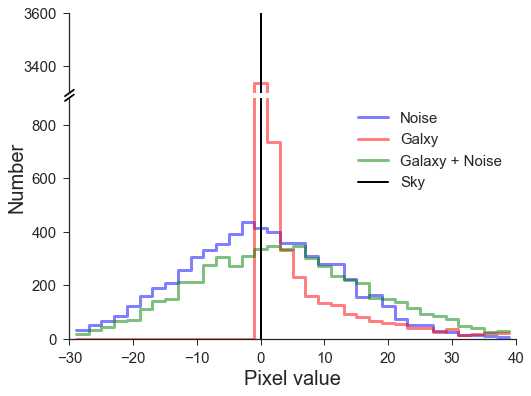

In [41]:
sns.set(style="ticks")

histrange = [-29, 39]
nbins  = int((histrange[1]-histrange[0])/2.)

ylim  = [3300., 3600.]
ylim2 = [0., 900.]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])



gs = gridspec.GridSpec(2, 1, height_ratios=[ylimratio, ylim2ratio])
fig = plt.figure(figsize=(8, 6)) 
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax.tick_params(axis='both', labelsize=15)   
ax2.tick_params(axis='both', labelsize=15)   
ax.set_xlim(-30,40);ax2.set_xlim(-30,40)

bins, edges = np.histogram(data3, nbins,range = histrange)
left, right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten(); Y = np.array([bins,bins]).T.flatten()
ax2.plot(X,Y,'-', color = 'blue', alpha=0.5, linewidth = 3, label = 'Noise')

bins, edges = np.histogram(data2[data2 > 0.], nbins,range = histrange)
left, right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten(); Y = np.array([bins,bins]).T.flatten()
ax.plot(X,Y,'-', color = 'red', alpha=0.5, linewidth = 3, label = 'Galaxy')
ax2.plot(X,Y,'-', color = 'red', alpha=0.5, linewidth = 3, label = 'Galxy')

bins, edges = np.histogram(data1, nbins,range = histrange)
left, right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten(); Y = np.array([bins,bins]).T.flatten()
ax2.plot(X,Y,'-', color = 'green', alpha=0.5, linewidth = 3, label = 'Galaxy + Noise')


ax.set_ylim(ylim)
ax2.set_ylim(ylim2)
plt.subplots_adjust(hspace=0.03)



ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()

ax2.set_xlabel('Pixel value',fontsize = fontsize)
ax2.set_ylabel('Number',fontsize = fontsize)
ax2.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure)


kwargs = dict(color='k', clip_on=False)
xlim = ax.get_xlim()
dx = .01*(xlim[1]-xlim[0])
dy = .01*(ylim[1]-ylim[0])/ylimratio
ax.plot((xlim[0]-dx,xlim[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
#ax.plot((xlim[1]-dx,xlim[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
dy = .01*(ylim2[1]-ylim2[0])/ylim2ratio
ax2.plot((xlim[0]-dx,xlim[0]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
#ax2.plot((xlim[1]-dx,xlim[1]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)


ax.plot([0,0],[0,3600],'k-',linewidth = 2)
ax2.plot([0,0],[0,3600],'k-',linewidth = 2,label ='Sky')


ax2.set_xticks([-30,-20,-10,0,10, 20,30,40],[-30,-20,-10,0,10, 20,30,40])

ax2.set_yticks([0,200,400,600,800])
ax.set_yticks([3400,3600])
ax.set_xticks([])

plt.legend(frameon=False,fontsize=15)
sns.despine(fig=fig, ax=ax2, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.show()
